<a href="https://colab.research.google.com/github/HARSHGit45/Machine_Learning_assignment/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df=df.drop('User ID',axis=1)

In [8]:
mp={'Male':0 , 'Female':1}
df['Gender']=df['Gender'].map(mp)


In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [11]:
x=df.iloc[:,:3]
y=df.iloc[:,3]

In [12]:
x

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000
...,...,...,...
395,1,46,41000
396,0,51,23000
397,1,50,20000
398,0,36,33000


<Axes: xlabel='Purchased', ylabel='count'>

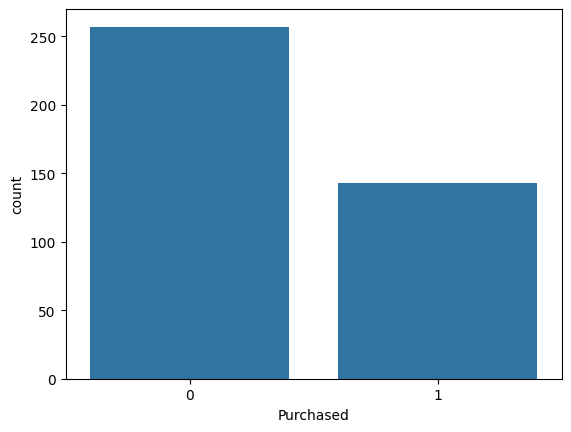

In [13]:
sns.countplot(data=df,x=y)

In [15]:
dt=tree.DecisionTreeClassifier()
s=StandardScaler()
x=s.fit_transform(x)

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [30]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

[Text(0.5574324324324325, 0.9583333333333334, 'x[1] <= 0.463\ngini = 0.463\nsamples = 280\nvalue = [178, 102]'),
 Text(0.31756756756756754, 0.875, 'x[2] <= 0.61\ngini = 0.27\nsamples = 199\nvalue = [167, 32]'),
 Text(0.12162162162162163, 0.7916666666666666, 'x[1] <= -0.11\ngini = 0.069\nsamples = 168\nvalue = [162, 6]'),
 Text(0.0945945945945946, 0.7083333333333334, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.14864864864864866, 0.7083333333333334, 'x[2] <= 0.448\ngini = 0.188\nsamples = 57\nvalue = [51, 6]'),
 Text(0.12162162162162163, 0.625, 'x[2] <= -0.066\ngini = 0.163\nsamples = 56\nvalue = [51, 5]'),
 Text(0.0945945945945946, 0.5416666666666666, 'gini = 0.0\nsamples = 31\nvalue = [31, 0]'),
 Text(0.14864864864864866, 0.5416666666666666, 'x[2] <= 0.022\ngini = 0.32\nsamples = 25\nvalue = [20, 5]'),
 Text(0.05405405405405406, 0.4583333333333333, 'x[0] <= -0.02\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.02702702702702703, 0.375, 'gini = 0.0\nsamples = 1\nvalue = 

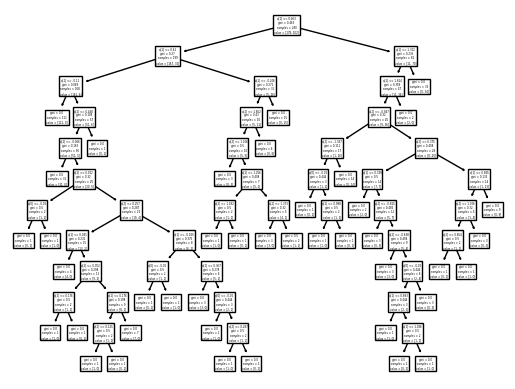

In [31]:
tree.plot_tree(dt)

In [32]:
import graphviz
dot_data = tree.export_graphviz(dt, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("sn")

'sn.pdf'

In [33]:
pred=dt.predict(xtest)

In [34]:
pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0])

In [35]:
cm=confusion_matrix(pred,ytest)
cm

array([[71, 15],
       [ 8, 26]])

<Axes: >

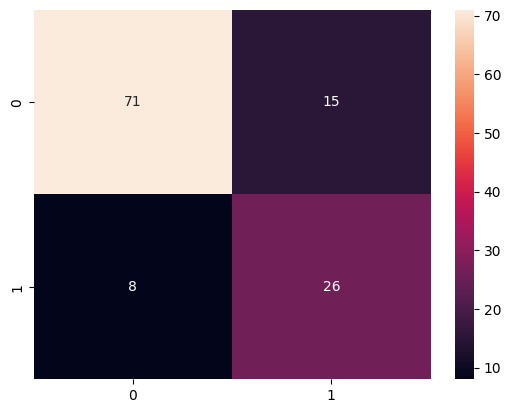

In [36]:
sns.heatmap(cm,annot=True)

In [28]:
acc=accuracy_score(pred,ytest)
acc

0.82